In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.metrics import make_scorer, mean_squared_error, log_loss

In [6]:
train = pd.read_csv("/Users/tgcn/Official_Things/Emory/MachinelearningI/final project/ProjectManipulatedTrainingData.csv")

In [9]:
train = train.drop(columns=['id','device_id'])

In [10]:
label_encoder = LabelEncoder()

In [11]:
train['site_id']=label_encoder.fit_transform(train['site_id'])
train['site_domain']=label_encoder.fit_transform(train['site_domain'])
train['site_category']=label_encoder.fit_transform(train['site_category'])
train['app_id']=label_encoder.fit_transform(train['app_id'])
train['app_domain']=label_encoder.fit_transform(train['app_domain'])
train['app_category']=label_encoder.fit_transform(train['app_category'])
train['device_model']=label_encoder.fit_transform(train['device_model'])
train['device_type']=label_encoder.fit_transform(train['device_type'])
train['device_conn_type']=label_encoder.fit_transform(train['device_conn_type'])
train['C14']=label_encoder.fit_transform(train['C14'])
train['C15']=label_encoder.fit_transform(train['C15'])
train['C16']=label_encoder.fit_transform(train['C16'])
train['C17']=label_encoder.fit_transform(train['C17'])
train['C19']=label_encoder.fit_transform(train['C19'])
train['C20']=label_encoder.fit_transform(train['C20'])
train['C21']=label_encoder.fit_transform(train['C21'])

array([[<AxesSubplot:title={'center':'click'}>,
        <AxesSubplot:title={'center':'C1'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'banner_pos'}>],
       [<AxesSubplot:title={'center':'site_id'}>,
        <AxesSubplot:title={'center':'site_domain'}>,
        <AxesSubplot:title={'center':'site_category'}>,
        <AxesSubplot:title={'center':'app_id'}>,
        <AxesSubplot:title={'center':'app_domain'}>],
       [<AxesSubplot:title={'center':'app_category'}>,
        <AxesSubplot:title={'center':'device_model'}>,
        <AxesSubplot:title={'center':'device_type'}>,
        <AxesSubplot:title={'center':'device_conn_type'}>,
        <AxesSubplot:title={'center':'C14'}>],
       [<AxesSubplot:title={'center':'C15'}>,
        <AxesSubplot:title={'center':'C16'}>,
        <AxesSubplot:title={'center':'C17'}>,
        <AxesSubplot:title={'center':'C18'}>,
        <AxesSubplot:title={'center':'C19'}

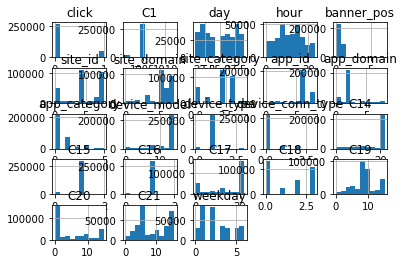

In [26]:
train.hist()

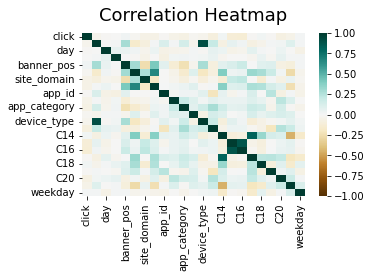

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

In [28]:
train.columns

Index(['click', 'C1', 'day', 'hour', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_model',
       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'weekday'],
      dtype='object')

In [13]:
newtrain = train.iloc[:255929]

In [14]:
newtrain.shape

(255929, 23)

In [15]:
newval = train.iloc[255929:]

In [16]:
newval.shape

(63982, 23)

In [17]:
X_train = newtrain.drop(columns='click')

In [18]:
y_train = newtrain.loc[:,'click']

In [19]:
X_test = newval.drop(columns='click')

In [20]:
y_test = newval.loc[:,'click']

In [24]:
gsearch = GridSearchCV(estimator=LogisticRegression(max_iter = 10000, random_state=42, solver='liblinear'),
                  param_grid=[{'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                              'penalty': ['l1','l2']
                              }],
                  scoring='neg_log_loss',
                  cv=5).fit(X_train, y_train)
gsearch.best_params_

{'C': 1, 'penalty': 'l1'}

In [27]:
bst=LogisticRegression(C=1, max_iter=10000, penalty='l1', random_state=42,
                   solver='liblinear')
bst.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', random_state=42,
                   solver='liblinear')

In [28]:
ypredval=bst.predict_proba(X_test)
sklearn.metrics.log_loss(y_test,ypredval,normalize=True,sample_weight=None,labels=None)

0.4364769553895842